**Part 1: Data Loading and Preprocessing**



1. Load the Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/onlinefoods.csv")
print(df.head())


   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

2. Handle Missing Values

In [ ]:
print(df.isnull().sum())

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


3. Encode Categorical Variables

In [ ]:
df_encoded=pd.get_dummies(df, columns=['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback' ])
print(df_encoded)

     Age  Family size  latitude  longitude  Pin code Unnamed: 12  \
0     20            4   12.9766    77.5993    560001         Yes   
1     24            3   12.9770    77.5773    560009         Yes   
2     22            3   12.9551    77.6593    560017         Yes   
3     22            6   12.9473    77.5616    560019         Yes   
4     22            4   12.9850    77.5533    560010         Yes   
..   ...          ...       ...        ...       ...         ...   
383   23            2   12.9766    77.5993    560001         Yes   
384   23            4   12.9854    77.7081    560048         Yes   
385   22            5   12.9850    77.5533    560010         Yes   
386   23            2   12.9770    77.5773    560009         Yes   
387   23            5   12.8988    77.5764    560078         Yes   

     Gender_Female  Gender_Male  Marital Status_Married  \
0                1            0                       0   
1                1            0                       0   
2     

4. Feature Selection

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies['fam_members'] = (df['Family size']>1).astype(int)

x = df_dummies.drop(['Age', 'Family size', 'latitude', 'longitude','Pin code'],axis=1)
y = df_dummies['fam_members']

**Part 2: Exploratory Data Analysis (EDA)**


1. Descriptive Statistics

In [ ]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


2. Visualizations

 * Distribution of Age and its impact on Feedback.

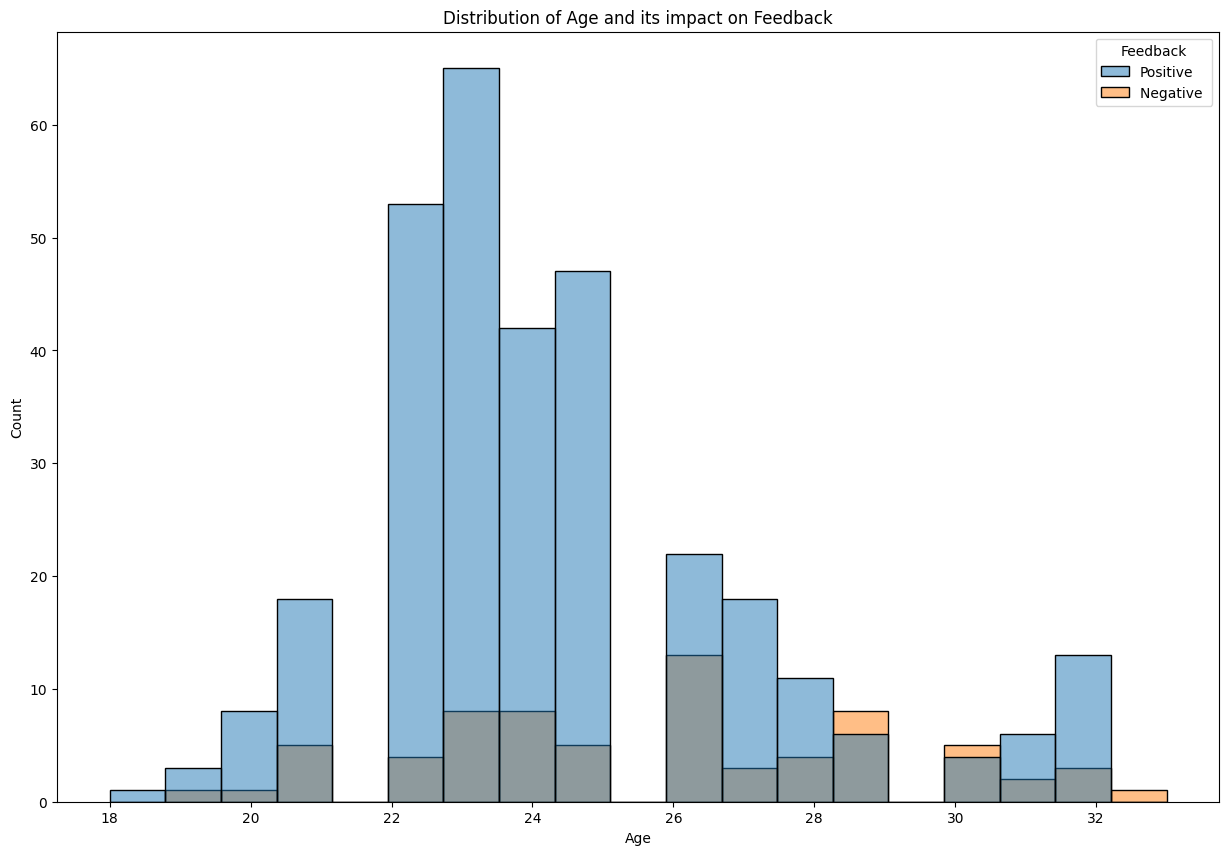

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Distribution of Age and its impact on Feedback")
sns.histplot(x="Age", hue="Feedback", data=df)
plt.show()

* Proportions of Feedback across different levels of Monthly Income.

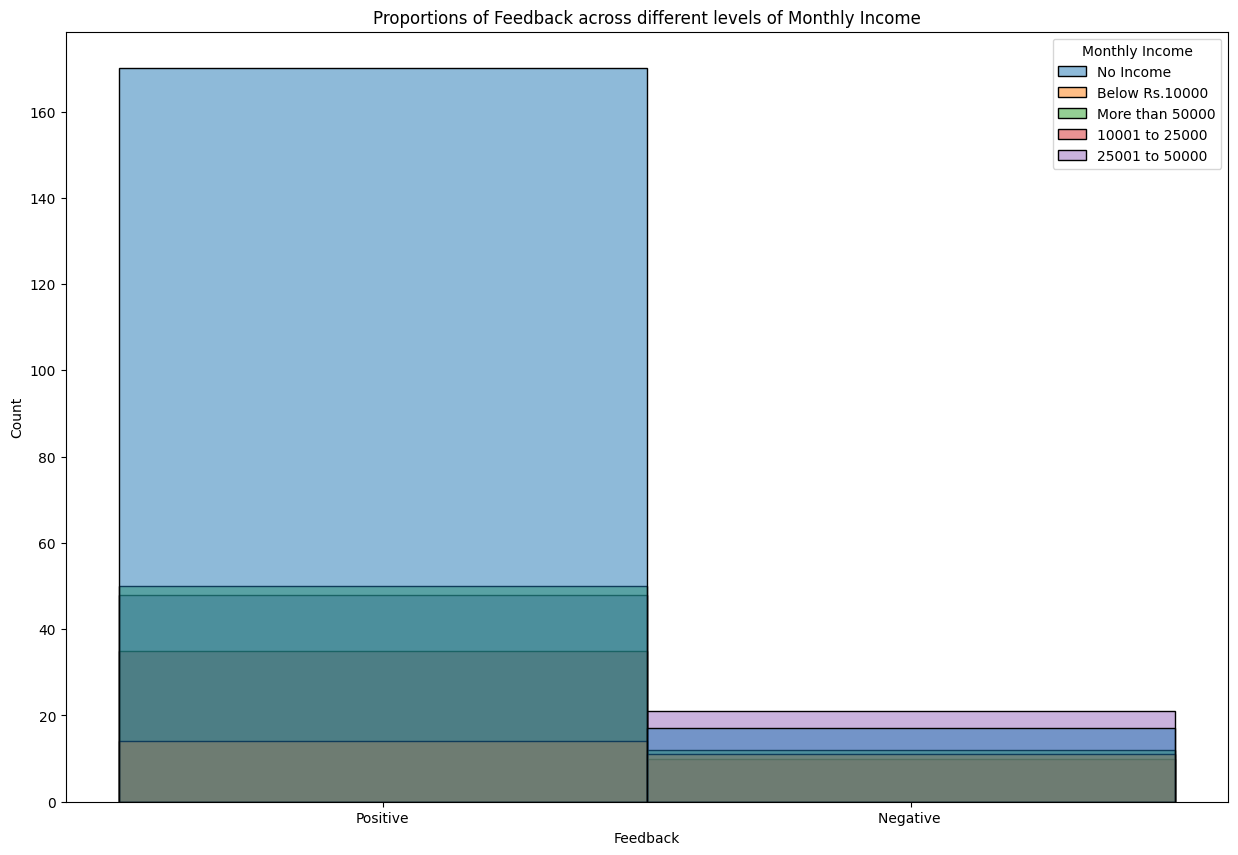

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Proportions of Feedback across different levels of Monthly Income")
sns.histplot(x="Feedback", hue="Monthly Income", data=df)
plt.show()

* Correlation matrix heatmap to identify any interesting correlations between features

<ipython-input-70-aba34ce34df5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


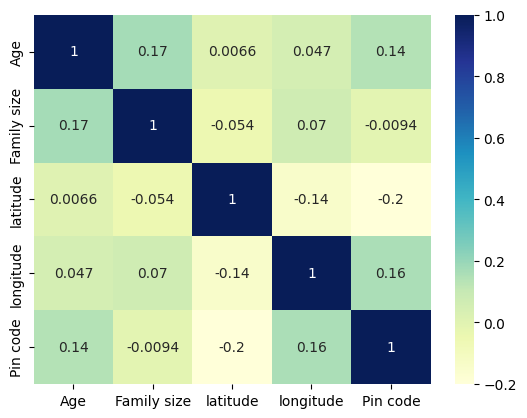

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

**Part 3:  Logistic Regression Model**

1. Build the Model


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

2. Model Evaluation

In [ ]:
y_pred = model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

Accuracy: 1.0
Confusion Matrix: 
[[ 2  0]
 [ 0 76]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        76

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



The model evaluation showed that it predicted all test instances correctly, with an accuracy score of 1.0. The confusion matrix confirmed that all 78 instances in the single class were accurately classified. Likewise, the classification report demonstrated perfect precision, recall, and F1-score, indicating the model's excellent performance in classifying instances.






**Part 4: Data Analysis and Visualization**

1. Feature Importance

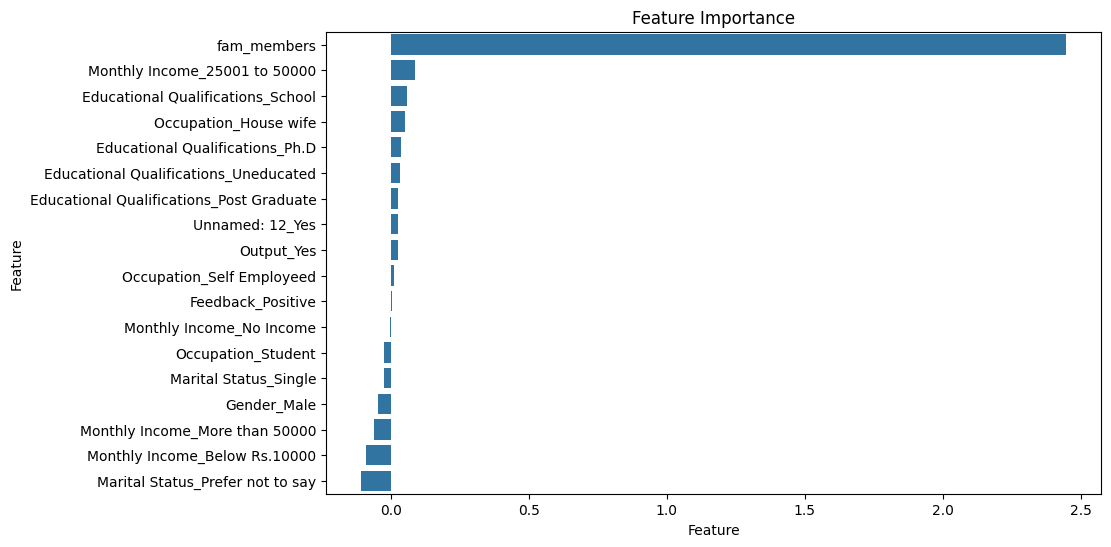

In [ ]:
feature_importance= pd.DataFrame({'Feature': x.columns, 'Importance': model.coef_[0]})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.xlabel('Feature')
plt.show()

The feature_importance DataFrame contains the features and their corresponding importance scores, sorted in descending order. Therefore, by visualizing this data using a barplot, we can observe the relative importance of each feature in influencing the feedback prediction. Thus, the result pertains that the higher the importance score, the greater impact the feature has on the model's predictions, providing insights into which aspects are most significant for determining feedback outcomes.

2. **Prediction** **Insights**

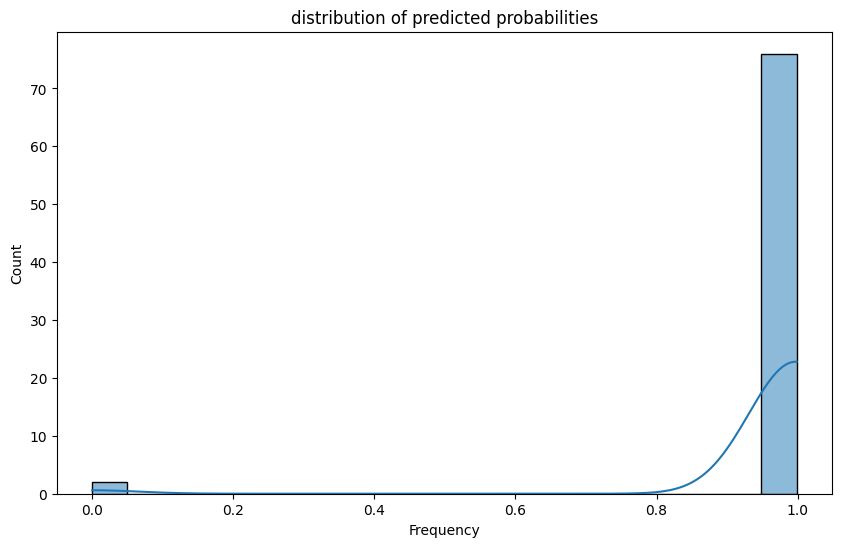

In [ ]:
y_pred_prob = model.predict_proba(x_test_scaled)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(y_pred_prob, bins=20, kde=True)
plt.title('distribution of predicted probabilities')
plt.xlabel('Predicted Probability')
plt.xlabel('Frequency')
plt.show()

Based on the data and histogram plot of predicted probabilities, we can observe that the model tends to assign high probabilities to the instances it predicts. This indicates that the model is confident in its predictions and shows a clear distinction between positive and negative feedback probabilities. The histogram's shape, with a peak at high probabilities, suggests that the model effectively distinguishes between positive and negative feedback instances with a high degree of certainty.